<a href="https://colab.research.google.com/github/emailvenky/ML/blob/master/CNN_MNIST_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 Live Project

Workflow

Load in the MNIST dataset and examine its structure.

Use any library to load the MNIST dataset (included with both TensorFlow and PyTorch modules).
Take a closer look at the data, inspecting its size, shape, and quantity.
Using eitherOpenCV or Matplotlib (or others), view some random samples of the handwritten digits and observe the complexity of the images. Do you have any issues identifying these written numbers?
Using NumPy or other libraries, prepare your dataset for training.

Ensure the format or shape of the data is appropriate for input into your model (one-hot-encoding is needed for the labels).
Ensure data types are correct and that data is normalized.
Create a CNN with these specifications:

Input dimensions of 28 x 28 x 1.
Two convolution layers (kernel size 3x3): the first with 64 filters, the second with 32. Use ReLU as the activation layer.
Max pooling of size 2 x 2.
Dropout rate of 0.25.
Add a sense layer comprising 128 outputs.
Add another dropout layer using a rate setting of 0.5.
Add the final Dense or Fully Connected Layer that indicates the class probabilities.
Train this CNN on the MNIST dataset you prepared in Step 2.

Train for at least 5 epochs using a batch size of 32.
Plot graphs showing how your training and validation loss and accuracy changed with respect to the epochs completed.

Save your model. You will be using it in the second milestone.

Test your model on some random samples from the test dataset.

Importance to project

In [1]:
#Use any library to load the MNIST dataset (included with both TensorFlow and PyTorch modules). 
#Take a closer look at the data, inspecting its size, shape, and quantity. 

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

0


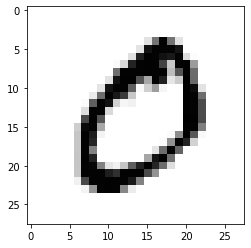

In [2]:
import matplotlib.pyplot as plt

image_index = 1 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Input dimensions of 28 x 28 x 1. Two convolution layers (kernel size 3x3): the first with 64 filters, the second with 32. Use ReLU as the activation layer. Max pooling of size 2 x 2. Dropout rate of 0.25. Add a sense layer comprising 128 outputs. Add another dropout layer using a rate setting of 0.5. Add the final Dense or Fully Connected Layer that indicates the class probabilities. Train this CNN on the MNIST dataset you prepared in Step 2.

Train for at least 5 epochs using a batch size of 32.
Plot graphs showing how your training and validation loss and accuracy changed with respect to the epochs completed.

Save your model. You will be using it in the second milestone.

Test your model on some random samples from the test dataset

In [4]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(64 , kernel_size=(3,3),  input_shape=input_shape))
model.add(Conv2D(32 , kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(10,activation=tf.nn.softmax))

In [5]:
# # Importing the required Keras modules containing model and layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# # Creating a Sequential Model and adding the layers
# model = Sequential()
# model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
# model.add(Dense(128, activation=tf.nn.relu))
# model.add(Dropout(0.2))
# model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.2483 - accuracy: 0.9247 - val_loss: 0.0807 - val_accuracy: 0.9753
Epoch 2/5
1875/1875 [==============================] - 188s 100ms/step - loss: 0.1300 - accuracy: 0.9611 - val_loss: 0.0603 - val_accuracy: 0.9814
Epoch 3/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.1059 - accuracy: 0.9670 - val_loss: 0.0631 - val_accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 190s 102ms/step - loss: 0.0917 - accuracy: 0.9725 - val_loss: 0.0560 - val_accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0857 - accuracy: 0.9734 - val_loss: 0.0546 - val_accuracy: 0.9843


In [7]:
print(history.history.keys())  

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


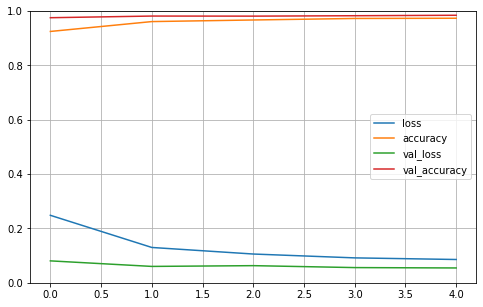

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [9]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk


In [10]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
import numpy as np

y_pred = model.predict_classes(x_new)
print(y_pred)
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
np.array(class_names)[y_pred]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[7 2 1]


array(['7', '2', '1'], dtype='<U1')